# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: santiago silva
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

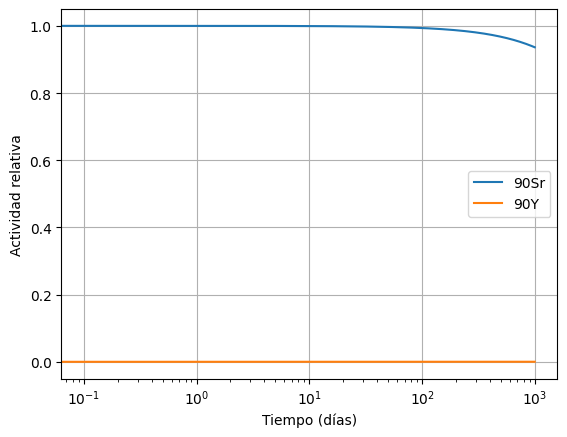

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
t_media_Sr = 28.78 * 365  # Convertir años a días
t_media_Y = 2.67  # Días
lambda_Sr = np.log(2) / t_media_Sr
lambda_Y = np.log(2) / t_media_Y

# Condiciones iniciales
N_Sr0 = 1.0  # Actividad inicial relativa
N_Y0 = 0.0

# Parámetros de simulación
dt = 0.1  # Paso de tiempo (días)
t_max = 1000  # Días
t = np.arange(0, t_max, dt)

# Método de Euler
N_Sr = np.zeros_like(t)
N_Y = np.zeros_like(t)
N_Sr[0] = N_Sr0
N_Y[0] = N_Y0

for i in range(1, len(t)):
    dN_Sr = -lambda_Sr * N_Sr[i-1] * dt
    dN_Y = (lambda_Sr * N_Sr[i-1] - lambda_Y * N_Y[i-1]) * dt

    N_Sr[i] = N_Sr[i-1] + dN_Sr
    N_Y[i] = N_Y[i-1] + dN_Y

# Graficar
plt.figure()
plt.semilogx(t, N_Sr, label='90Sr')
plt.semilogx(t, N_Y, label='90Y')
plt.xlabel('Tiempo (días)')
plt.ylabel('Actividad relativa')
plt.legend()
plt.grid()
plt.show()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

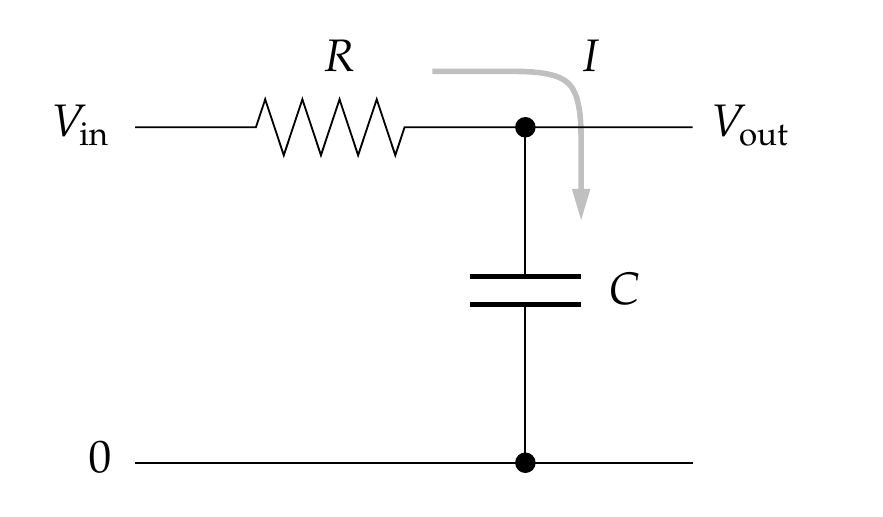

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

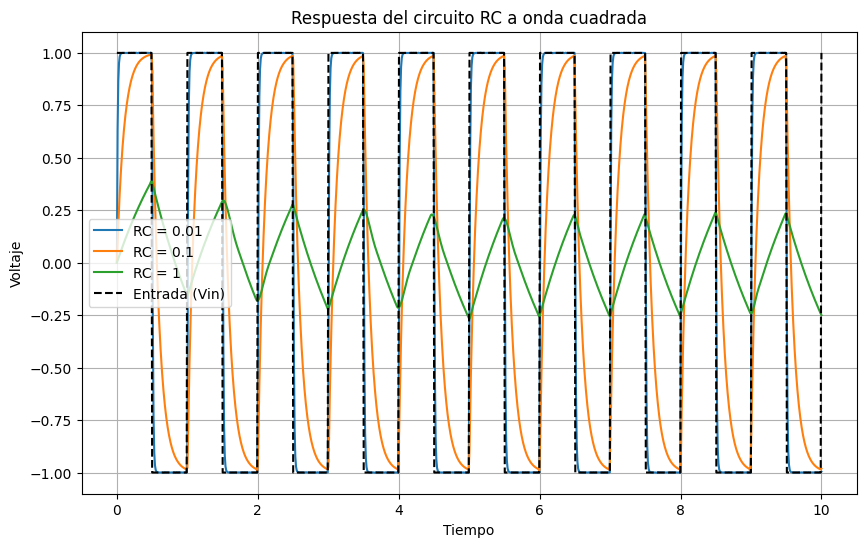

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Función para la onda cuadrada de entrada
def vin(t):
    return 1 if np.floor(2*t) % 2 == 0 else -1

# Ecuación diferencial del circuito
def circuito(t, Vout, RC):
    return (vin(t) - Vout)/RC

# Parámetros de simulación
t_span = (0, 10)
V0 = [0]  # Condición inicial
RC_values = [0.01, 0.1, 1]  # Valores de RC a probar
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver para cada RC
plt.figure(figsize=(10, 6))
for RC in RC_values:
    sol = solve_ivp(circuito, t_span, V0, args=(RC,), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=f'RC = {RC}')

# Graficar entrada
input_signal = np.array([vin(t) for t in t_eval])
plt.plot(t_eval, input_signal, 'k--', label='Entrada (Vin)')

plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.title('Respuesta del circuito RC a onda cuadrada')
plt.legend()
plt.grid()
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

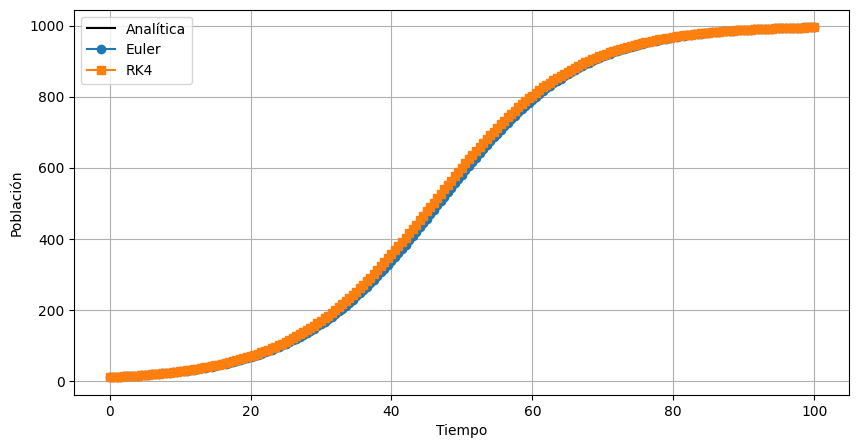

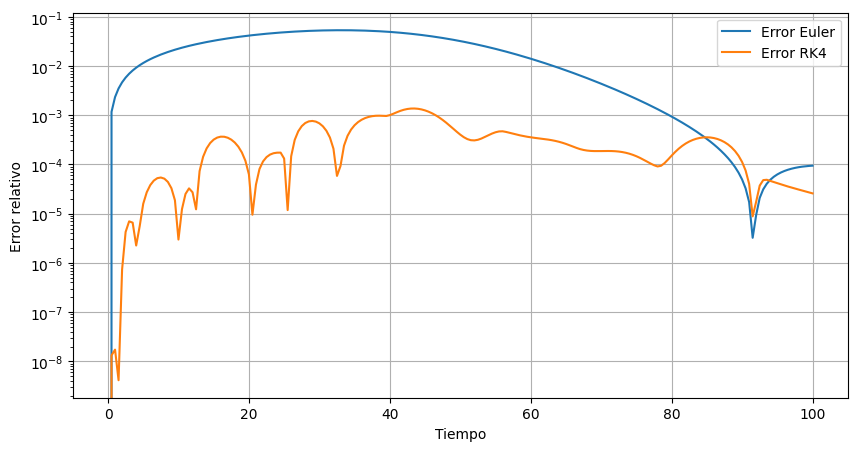

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
r = 0.1
K = 1000
P0 = 10
t_span = (0, 100)
dt = 0.5

# Solución analítica
def analytical_solution(t, P0, r, K):
    return (K * P0 * np.exp(r*t)) / (K + P0 * (np.exp(r*t) - 1))

# Ecuación diferencial para solve_ivp
def my_logistic_eq(t, P, r, K):
    return r * P * (1 - P/K)

# Método de Euler
def euler_method(f, P0, t_span, dt, r, K):
    t = np.arange(t_span[0], t_span[1]+dt, dt)
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        P[i] = P[i-1] + f(t[i-1], P[i-1], r, K) * dt
    return t, P

# Soluciones
t_euler, P_euler = euler_method(my_logistic_eq, P0, t_span, dt, r, K)
sol_rk4 = solve_ivp(my_logistic_eq, t_span, [P0], args=(r, K), t_eval=t_euler)
t_ana = np.linspace(t_span[0], t_span[1], 500)
P_ana = analytical_solution(t_ana, P0, r, K)

# Gráficos
plt.figure(figsize=(10,5))
plt.plot(t_ana, P_ana, label='Analítica', color='black')
plt.plot(t_euler, P_euler, 'o-', label='Euler')
plt.plot(sol_rk4.t, sol_rk4.y[0], 's-', label='RK4')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid()
plt.show()

# Cálculo de errores
P_ana_euler = analytical_solution(t_euler, P0, r, K)
P_ana_rk4 = analytical_solution(sol_rk4.t, P0, r, K)

error_euler = np.abs(P_euler - P_ana_euler)/P_ana_euler
error_rk4 = np.abs(sol_rk4.y[0] - P_ana_rk4)/P_ana_rk4

plt.figure(figsize=(10,5))
plt.plot(t_euler, error_euler, label='Error Euler')
plt.plot(sol_rk4.t, error_rk4, label='Error RK4')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

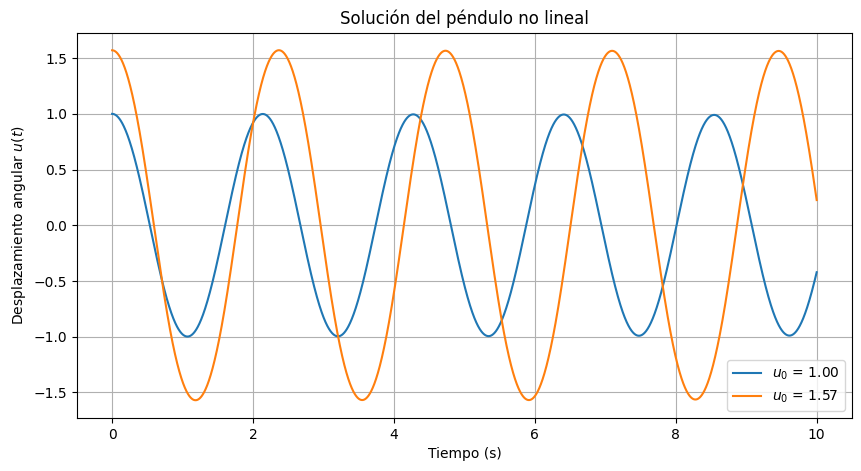

/tmp/ipython-input-317204316.py:49: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
  peaks = np.where(np.diff(np.sign(sol.y[0]))[0])[0]


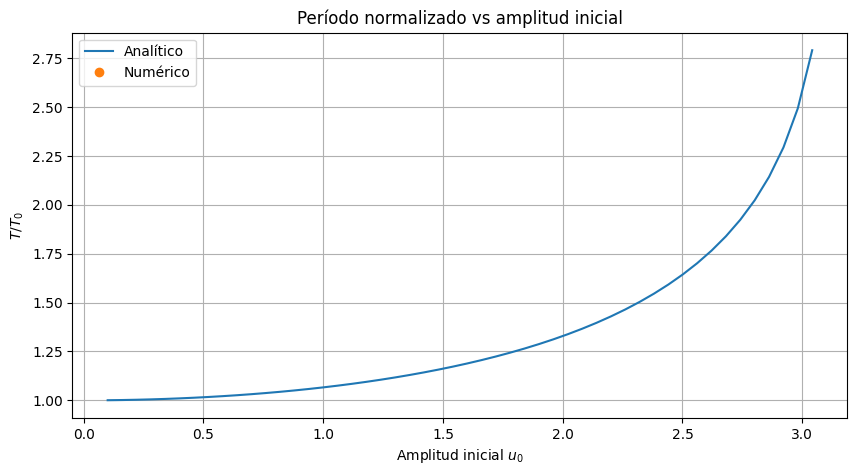

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import ellipk

# Parámetros físicos
g = 9.81
l = 1.0
T0 = np.sqrt(l/g)

# Función para la ecuación diferencial
def pendulum(t, y):
    u, v = y
    dudt = v
    dvdt = -(g/l) * np.sin(u)
    return [dudt, dvdt]

# Condiciones iniciales y tiempo
u0_values = [1.0, np.pi/2]
t_span = (0, 10)
h = 0.001
t_eval = np.arange(t_span[0], t_span[1], h)

# Resolver para cada u0
plt.figure(figsize=(10, 5))
for u0 in u0_values:
    sol = solve_ivp(pendulum, t_span, [u0, 0], t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=f'$u_0$ = {u0:.2f}')

plt.title('Solución del péndulo no lineal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento angular $u(t)$')
plt.legend()
plt.grid()
plt.show()

# Calcular período teórico vs numérico
u0_range = np.linspace(0.1, np.pi-0.1, 50)
T_analytical = []
T_numerical = []

for u0 in u0_range:
    # Período analítico
    alpha = np.sin(u0/2)**2
    T_analytical.append(2/np.pi * ellipk(alpha) * T0)

    # Período numérico
    sol = solve_ivp(pendulum, (0, 20), [u0, 0], method='RK45', rtol=1e-8)
    peaks = np.where(np.diff(np.sign(sol.y[0]))[0])[0]
    if len(peaks) > 2:
        T_numerical.append(2*(sol.t[peaks[2]] - sol.t[peaks[0]]))

# Graficar comparación
plt.figure(figsize=(10, 5))
plt.plot(u0_range, np.array(T_analytical)/T0, label='Analítico')
plt.plot(u0_range[:len(T_numerical)], np.array(T_numerical)/T0, 'o', label='Numérico')
plt.title('Período normalizado vs amplitud inicial')
plt.xlabel('Amplitud inicial $u_0$')
plt.ylabel('$T/T_0$')
plt.legend()
plt.grid()
plt.show()

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

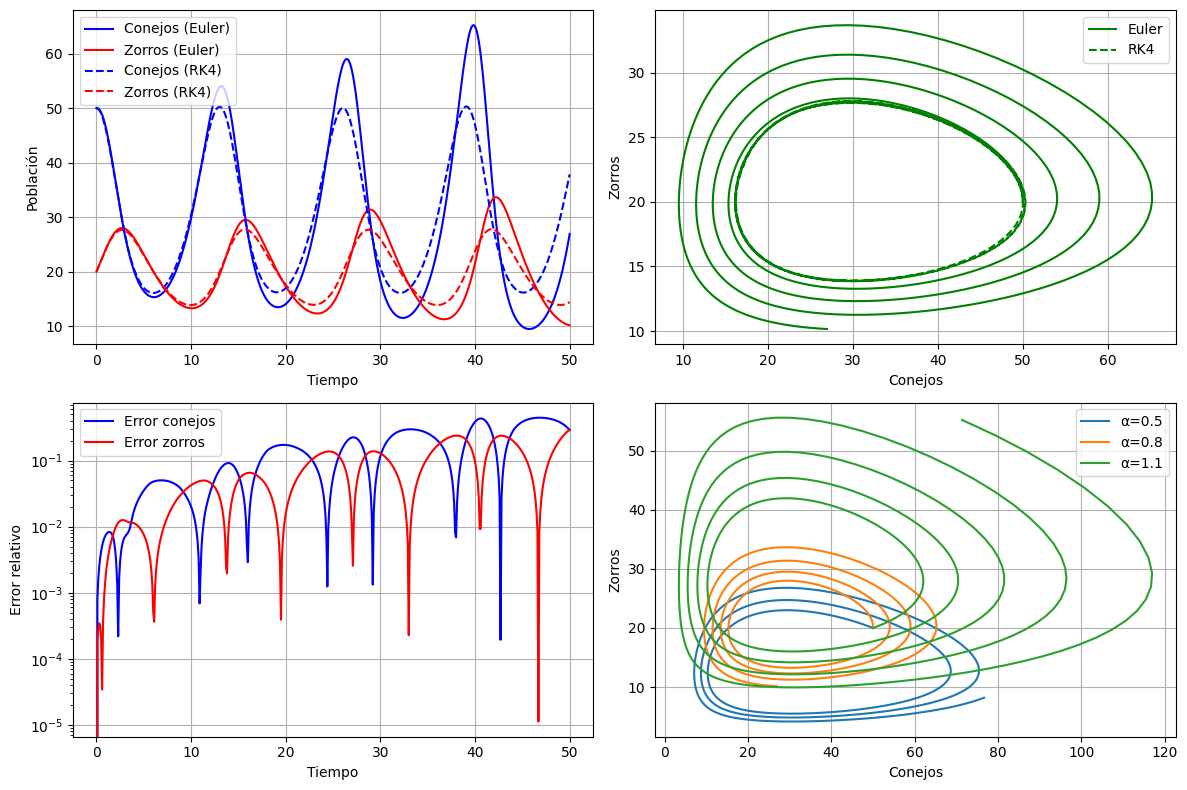

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
alpha, beta = 0.8, 0.04
gamma, delta = 0.3, 0.01
x0, y0 = 50, 20
t_span = (0, 50)
h = 0.1
t = np.arange(t_span[0], t_span[1]+h, h)

# Sistema de ecuaciones
def model(t, z):
    x, y = z
    dxdt = alpha*x - beta*x*y
    dydt = -gamma*y + delta*x*y
    return [dxdt, dydt]

# Método de Euler
def euler():
    x, y = np.zeros_like(t), np.zeros_like(t)
    x[0], y[0] = x0, y0
    for i in range(1, len(t)):
        dxdt, dydt = model(t[i-1], [x[i-1], y[i-1]])
        x[i] = x[i-1] + dxdt*h
        y[i] = y[i-1] + dydt*h
    return x, y

# Métodos RK2 y RK4
def rk2():
    sol = solve_ivp(model, t_span, [x0, y0], t_eval=t, method='RK23')
    return sol.y[0], sol.y[1]

def rk4():
    sol = solve_ivp(model, t_span, [x0, y0], t_eval=t, method='RK45')
    return sol.y[0], sol.y[1]

# Simulaciones
x_euler, y_euler = euler()
x_rk2, y_rk2 = rk2()
x_rk4, y_rk4 = rk4()

# Gráficos
plt.figure(figsize=(12, 8))

# Evolución temporal
plt.subplot(2, 2, 1)
plt.plot(t, x_euler, 'b-', label='Conejos (Euler)')
plt.plot(t, y_euler, 'r-', label='Zorros (Euler)')
plt.plot(t, x_rk4, 'b--', label='Conejos (RK4)')
plt.plot(t, y_rk4, 'r--', label='Zorros (RK4)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid()

# Diagrama de fase
plt.subplot(2, 2, 2)
plt.plot(x_euler, y_euler, 'g-', label='Euler')
plt.plot(x_rk4, y_rk4, 'g--', label='RK4')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.legend()
plt.grid()

# Error relativo
plt.subplot(2, 2, 3)
error_x = np.abs(x_euler - x_rk4)/x_rk4
error_y = np.abs(y_euler - y_rk4)/y_rk4
plt.plot(t, error_x, 'b-', label='Error conejos')
plt.plot(t, error_y, 'r-', label='Error zorros')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.yscale('log')
plt.legend()
plt.grid()

# Variación de parámetros (ejemplo con alpha)
plt.subplot(2, 2, 4)
# Reset alpha to its initial value before the loop
alpha = 0.8
for alpha_val in [0.5, 0.8, 1.1]:
    alpha = alpha_val
    x, y = euler()
    plt.plot(x, y, label=f'α={alpha_val}')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


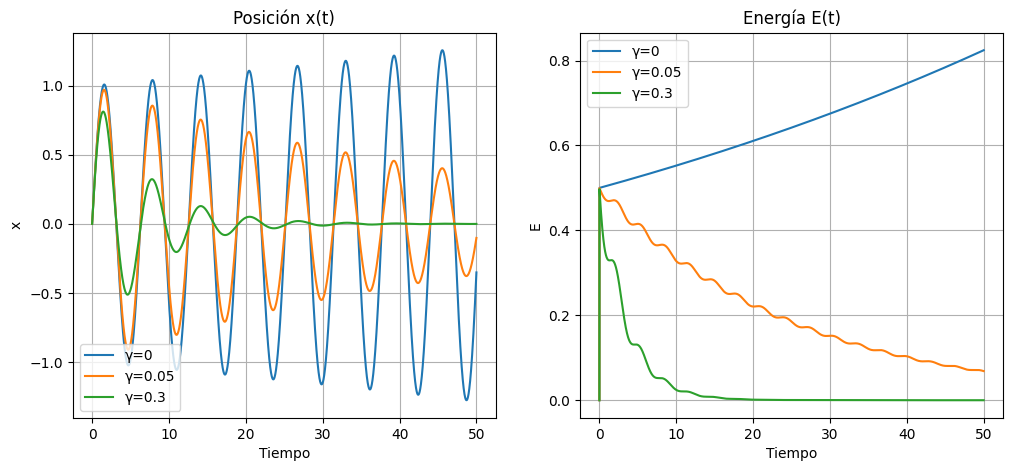

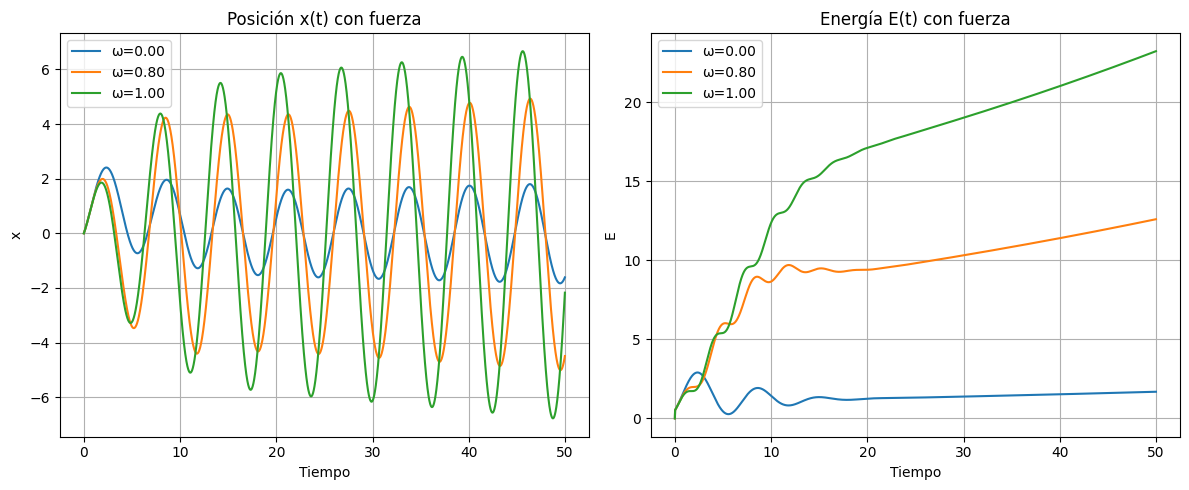

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m = 1.0
k = 1.0
omega0 = np.sqrt(k/m)
F0 = 1.0
T = 10.0

# Configuración temporal
dt = 0.01
t_max = 50.0
t = np.arange(0, t_max, dt)

# Función para resolver el sistema
def solve_oscillator(gamma=0.0, F_case=0, omega=0.0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    E = np.zeros_like(t)

    x[0] = 0.0
    v[0] = 1.0

    for i in range(1, len(t)):
        # Definir fuerza según el caso
        if F_case == 0:
            F = 0.0
        else:
            F = F0 * np.cos(omega * t[i]) * np.exp(-t[i]**2 / T**2)

        # Ecuaciones diferenciales
        dxdt = v[i-1]
        dvdt = F/m - gamma*v[i-1] - omega0**2 * x[i-1]

        # Método de Euler
        x[i] = x[i-1] + dxdt * dt
        v[i] = v[i-1] + dvdt * dt

        # Energía
        E[i] = 0.5*m*v[i]**2 + 0.5*k*x[i]**2

    return x, E

# Primer caso: F=0, diferentes gammas
plt.figure(figsize=(12, 5))
gammas = [0, 0.05, 0.3]
for gamma in gammas:
    x, E = solve_oscillator(gamma=gamma)
    plt.subplot(1, 2, 1)
    plt.plot(t, x, label=f'γ={gamma}')
    plt.subplot(1, 2, 2)
    plt.plot(t, E, label=f'γ={gamma}')

plt.subplot(1, 2, 1)
plt.title('Posición x(t)')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Energía E(t)')
plt.xlabel('Tiempo')
plt.ylabel('E')
plt.legend()
plt.grid()

# Segundo caso: γ=0, diferentes omegas
plt.figure(figsize=(12, 5))
omegas = [0, 0.8*omega0, omega0]
for omega in omegas:
    x, E = solve_oscillator(gamma=0.0, F_case=1, omega=omega)
    plt.subplot(1, 2, 1)
    plt.plot(t, x, label=f'ω={omega:.2f}')
    plt.subplot(1, 2, 2)
    plt.plot(t, E, label=f'ω={omega:.2f}')

plt.subplot(1, 2, 1)
plt.title('Posición x(t) con fuerza')
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Energía E(t) con fuerza')
plt.xlabel('Tiempo')
plt.ylabel('E')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

Valor crítico teórico: μ ≈ 0.03852
Valor crítico calculado: μ ≈ 0.03900

Estabilidad para Sol-Tierra (μ=3.00e-06): Estable
Estabilidad para Sol-Júpiter (μ=9.54e-04): Estable


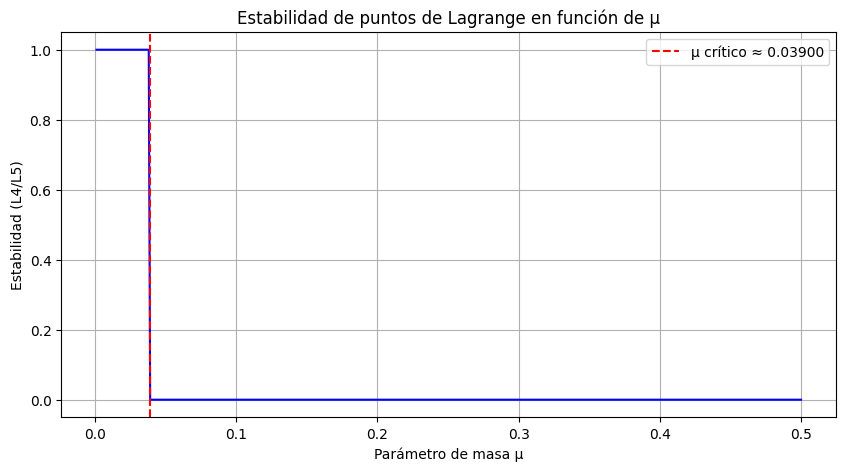

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la matriz A del sistema linealizado
def matriz_A(mu):
    # Segundas derivadas del potencial en L4/L5
    U_xx = 3/4
    U_xy = (3*np.sqrt(3)/4)*(1 - 2*mu)
    U_yy = 9/4

    A = np.array([
        [0, 1, 0, 0],
        [U_xx, 0, U_xy, 2],
        [0, 0, 0, 1],
        [U_xy, -2, U_yy, 0]
    ])
    return A

# Análisis de estabilidad para diferentes mu
mu_values = np.linspace(0.001, 0.5, 500)
estable = []

for mu in mu_values:
    A = matriz_A(mu)
    eigvals = np.linalg.eigvals(A)
    # Verificar si todos los valores propios son imaginarios puros
    if np.all(np.abs(eigvals.real) < 1e-8):
        estable.append(True)
    else:
        estable.append(False)

# Encontrar mu crítico
mu_critico = mu_values[np.where(np.array(estable) == False)[0][0]]

# Casos particulares (Sol-Tierra y Sol-Júpiter)
mu_tierra = 3.003e-6
mu_jupiter = 9.537e-4

# Resultados
print(f"Valor crítico teórico: μ ≈ 0.03852")
print(f"Valor crítico calculado: μ ≈ {mu_critico:.5f}")
print(f"\nEstabilidad para Sol-Tierra (μ={mu_tierra:.2e}): {'Estable' if mu_tierra < mu_critico else 'Inestable'}")
print(f"Estabilidad para Sol-Júpiter (μ={mu_jupiter:.2e}): {'Estable' if mu_jupiter < mu_critico else 'Inestable'}")

# Gráfico de estabilidad vs mu
plt.figure(figsize=(10,5))
plt.plot(mu_values, estable, 'b-')
plt.axvline(x=mu_critico, color='r', linestyle='--', label=f'μ crítico ≈ {mu_critico:.5f}')
plt.xlabel('Parámetro de masa μ')
plt.ylabel('Estabilidad (L4/L5)')
plt.title('Estabilidad de puntos de Lagrange en función de μ')
plt.legend()
plt.grid()
plt.show()

# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


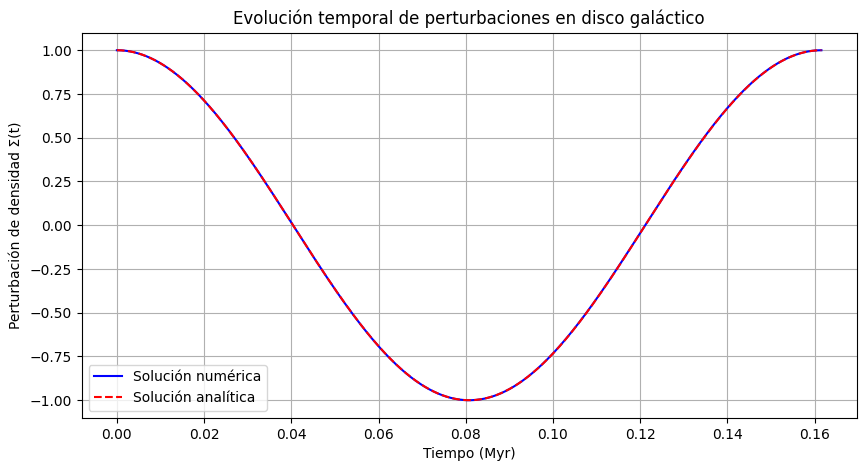

Valores propios del sistema: [0.+38.89087297j 0.-38.89087297j]
Parte real: [0. 0.]
Parte imaginaria: [ 38.89087297 -38.89087297]


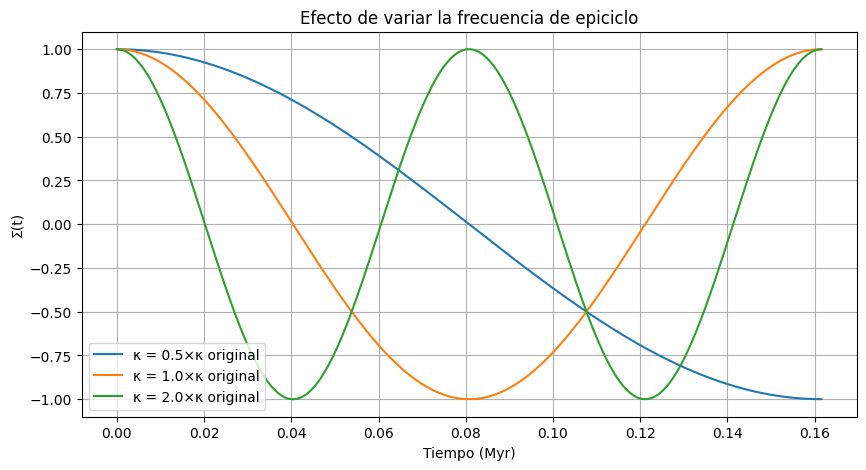

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
V0 = 220  # km/s (velocidad de rotación típica)
r = 8.0   # kpc (radio galáctico típico)
Sigma0 = 1.0  # Densidad superficial inicial
dSigma0 = 0.0  # Derivada inicial de densidad

# Frecuencia angular y de epiciclo
Omega = V0/r
kappa = np.sqrt(2)*Omega

# Ecuación diferencial de segundo orden
def galactic_disk(t, y):
    Sigma, dSigma = y
    return [dSigma, -kappa**2 * Sigma]

# Solución numérica
t_span = (0, 2*np.pi/kappa)  # Un periodo completo
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(galactic_disk, t_span, [Sigma0, dSigma0], t_eval=t_eval)

# Solución analítica
Sigma_analytical = Sigma0 * np.cos(kappa*t_eval) + (dSigma0/kappa) * np.sin(kappa*t_eval)

# Gráfico de la evolución temporal
plt.figure(figsize=(10, 5))
plt.plot(t_eval, sol.y[0], 'b-', label='Solución numérica')
plt.plot(t_eval, Sigma_analytical, 'r--', label='Solución analítica')
plt.xlabel('Tiempo (Myr)')
plt.ylabel('Perturbación de densidad Σ(t)')
plt.legend()
plt.grid()
plt.title('Evolución temporal de perturbaciones en disco galáctico')
plt.show()

# Análisis de estabilidad
A = np.array([[0, 1], [-kappa**2, 0]])  # Matriz del sistema
eigenvalues = np.linalg.eigvals(A)

print("Valores propios del sistema:", eigenvalues)
print("Parte real:", eigenvalues.real)
print("Parte imaginaria:", eigenvalues.imag)

# Efecto de cambiar kappa
plt.figure(figsize=(10, 5))
for kappa_mult in [0.5, 1.0, 2.0]:
    kappa_new = kappa_mult * kappa
    galactic_disk_new = lambda t, y: [y[1], -kappa_new**2 * y[0]]
    sol_new = solve_ivp(galactic_disk_new, t_span, [Sigma0, dSigma0], t_eval=t_eval)
    plt.plot(t_eval, sol_new.y[0], label=f'κ = {kappa_mult:.1f}×κ original')

plt.xlabel('Tiempo (Myr)')
plt.ylabel('Σ(t)')
plt.legend()
plt.grid()
plt.title('Efecto de variar la frecuencia de epiciclo')
plt.show()

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

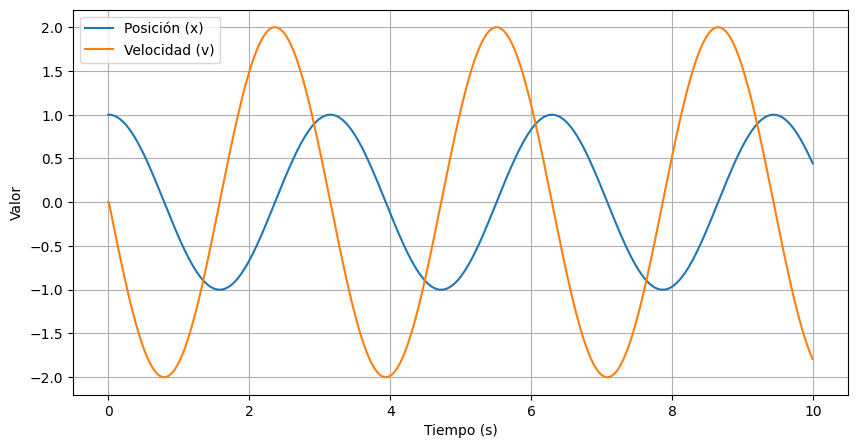

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
omega = 2.0  # Frecuencia angular (rad/s)
dt = 0.01    # Paso de tiempo (s)
t_max = 10.0 # Tiempo final (s)
t = np.arange(0, t_max, dt)

# Condiciones iniciales
x0 = 1.0  # Posición inicial
v0 = 0.0  # Velocidad inicial

# Inicializar arrays
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0] = x0

# Inicializar velocidad en t = -1/2 usando la relación dada
v_half = v0 - 0.5 * (-omega**2 * x0) * dt

# Método Leapfrog
for n in range(1, len(t)):
    # Actualizar posición
    x[n] = x[n-1] + v_half * dt

    # Calcular aceleración
    a = -omega**2 * x[n]

    # Actualizar velocidad
    v_half = v_half + a * dt

    # Guardar velocidad en tiempo entero (para graficar)
    v[n] = v_half - 0.5 * a * dt

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Posición (x)')
plt.plot(t, v, label='Velocidad (v)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.show()